<a href="https://colab.research.google.com/github/sivasamy1/data_analytics/blob/main/airport_airlines_miniproject_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from tabulate import tabulate

## **PART I**

In [54]:
df_airports = pd.read_csv("/content/drive/MyDrive/data_analytics/airport/airports.dat.txt")
df_airports.columns = ["Airport_ID","Name","City","Country","IATA","ICAO","Latitude","Longitude","Altitude","Timezone","DST","Tz database timezone","Type","Source"]

print(tabulate(df_airports.head(10), headers='keys', tablefmt='psql'))

+----+--------------+---------------------------------------------+--------------+------------------+--------+--------+------------+-------------+------------+------------+-------+------------------------+---------+-------------+
|    |   Airport_ID | Name                                        | City         | Country          | IATA   | ICAO   |   Latitude |   Longitude |   Altitude |   Timezone | DST   | Tz database timezone   | Type    | Source      |
|----+--------------+---------------------------------------------+--------------+------------------+--------+--------+------------+-------------+------------+------------+-------+------------------------+---------+-------------|
|  0 |            2 | Madang Airport                              | Madang       | Papua New Guinea | MAG    | AYMD   |   -5.20708 |    145.789  |         20 |         10 | U     | Pacific/Port_Moresby   | airport | OurAirports |
|  1 |            3 | Mount Hagen Kagamuga Airport                | Mount Hagen 


### **1.1. Top 20 highest altitude airports in the world. Choose only “type” with “airport”**###


In [ ]:
df_airport = df_airports[df_airports["Type"] == "airport"]
df_top20 = df_airport.sort_values(by='Altitude', ascending=False).head(20)
df_top20['Rank'] = df_top20['Altitude'].rank(ascending=False)

df_top20_final = df_top20[['Airport_ID', 'Name', 'City', 'Country', 'Altitude', 'Rank']]

print(tabulate(df_top20_final, headers='keys', tablefmt='psql'))

+------+--------------+----------------------------------------+-------------+-----------+------------+--------+
|      |   Airport_ID | Name                                   | City        | Country   |   Altitude |   Rank |
|------+--------------+----------------------------------------+-------------+-----------+------------+--------|
| 6541 |         9310 | Daocheng Yading Airport                | Daocheng    | China     |      14472 |      1 |
| 5027 |         6396 | Qamdo Bangda Airport                   | Bangda      | China     |      14219 |      2 |
| 6392 |         8921 | Kangding Airport                       | Kangding    | China     |      14042 |      3 |
| 5871 |         7932 | Ngari Gunsa Airport                    | Shiquanhe   | China     |      14022 |      4 |
| 2624 |         2762 | El Alto International Airport          | La Paz      | Bolivia   |      13355 |      5 |
| 2626 |         2764 | Capitan Nicolas Rojas Airport          | Potosi      | Bolivia   |      

### **1.2. Top 20 countries that have the highest total number of airports.** ###

In [ ]:

df_top_20_countries = df_airports.groupby(['Country']).size().to_frame('total_airports').reset_index(drop=False)
df_top_20_countries = df_top_20_countries.sort_values(by=['total_airports'],ascending=False)
df_top_20_countries ['rank'] = df_top_20_countries['total_airports'].rank(ascending=False)
df_top_20_countries = df_top_20_countries.head(20)

print(tabulate(df_top_20_countries, headers='keys', tablefmt='psql'))

+-----+----------------+------------------+--------+
|     | Country        |   total_airports |   rank |
|-----+----------------+------------------+--------|
| 223 | United States  |             1512 |    1   |
|  37 | Canada         |              430 |    2   |
|  11 | Australia      |              334 |    3   |
| 176 | Russia         |              264 |    4.5 |
|  27 | Brazil         |              264 |    4.5 |
|  79 | Germany        |              249 |    6   |
|  43 | China          |              241 |    7   |
|  73 | France         |              217 |    8   |
| 222 | United Kingdom |              167 |    9   |
|  97 | India          |              148 |   10   |
|  98 | Indonesia      |              145 |   11   |
| 106 | Japan          |              123 |   12   |
| 195 | South Africa   |               99 |   13   |
|   8 | Argentina      |               96 |   14   |
| 136 | Mexico         |               84 |   15   |
| 104 | Italy          |               83 |   

### **1.3. Top 20 cities that have the highest total number of airports. (Two cities from different countries can have the same name, and you have to make sure the numbers are not messed up due to that!)** ###


In [ ]:
df_top20_cities = df_airports.groupby(['City']).size().reset_index(name='total_airports')
df_top20_cities = df_top20_cities.sort_values(by='total_airports', ascending=False)
df_top20_cities['rank'] = df_top20_cities['total_airports'].rank(ascending=False)
df_top20_cities = df_top20_cities[['City', 'total_airports', 'rank']].head(20).reset_index(drop=True)

print(tabulate(df_top20_cities, headers='keys', tablefmt='psql'))

+----+--------------+------------------+--------+
|    | City         |   total_airports |   rank |
|----+--------------+------------------+--------|
|  0 | London       |                9 |    1   |
|  1 | Columbus     |                8 |    2   |
|  2 | Georgetown   |                7 |    3.5 |
|  3 | San Jose     |                7 |    3.5 |
|  4 | Houston      |                6 |    8   |
|  5 | New York     |                6 |    8   |
|  6 | Moscow       |                6 |    8   |
|  7 | Alexandria   |                6 |    8   |
|  8 | Jacksonville |                6 |    8   |
|  9 | Santiago     |                6 |    8   |
| 10 | Greenville   |                6 |    8   |
| 11 | Victoria     |                5 |   17   |
| 12 | Burlington   |                5 |   17   |
| 13 | Atlanta      |                5 |   17   |
| 14 | Hamilton     |                5 |   17   |
| 15 | Rome         |                5 |   17   |
| 16 | Richmond     |                5 |   17   |


### **1.4. Pair of cities that have the same name, but from two different countries.** ###
### (hint: Use self join with query in Python) ###

In [ ]:
same_name_cities = []
grouped = df_airports.groupby('City')

for city, group in grouped:
    if len(group) > 1:
        countries = group['Country'].tolist()
        for i in range(len(group)):
            for j in range(i + 1, len(group)):
                country_a = group.iloc[i]['Country']
                country_b = group.iloc[j]['Country']
                if country_a != country_b:
                    pair = tuple(sorted([country_a, country_b]))
                    same_name_cities.append((city, pair[0], city, pair[1]))

same_name_cities_df = pd.DataFrame(same_name_cities, columns=['City_A', 'Country_A', 'City_B', 'Country_B']).drop_duplicates()

print(same_name_cities_df)

         City_A       Country_A      City_B      Country_B
0      Aberdeen  United Kingdom    Aberdeen  United States
2        Albany       Australia      Albany  United States
4    Alexandria           Egypt  Alexandria         Greece
5    Alexandria           Egypt  Alexandria  United States
9    Alexandria          Greece  Alexandria  United States
..          ...             ...         ...            ...
285    Victoria           Chile    Victoria  United States
288     Vitoria          Brazil     Vitoria          Spain
289      Warsaw          Poland      Warsaw  United States
292    Waterloo          Canada    Waterloo  United States
293  Wellington     New Zealand  Wellington  United States

[164 rows x 4 columns]


## **PART II**

In [ ]:
df_airports2 = pd.read_csv("/content/drive/MyDrive/data_analytics/Airports2.csv")

print(tabulate(df_airports2.head(20), headers='keys', tablefmt='psql'))

+----+------------------+-----------------------+---------------+--------------------+--------------+---------+-----------+------------+------------+---------------------+--------------------------+-------------------+--------------------+--------------------+---------------------+
|    | Origin_airport   | Destination_airport   | Origin_city   | Destination_city   |   Passengers |   Seats |   Flights |   Distance | Fly_date   |   Origin_population |   Destination_population |   Org_airport_lat |   Org_airport_long |   Dest_airport_lat |   Dest_airport_long |
|----+------------------+-----------------------+---------------+--------------------+--------------+---------+-----------+------------+------------+---------------------+--------------------------+-------------------+--------------------+--------------------+---------------------|
|  0 | MHK              | AMW                   | Manhattan, KS | Ames, IA           |           21 |      30 |         1 |        254 | 2008-10-01 |  

In [ ]:
print(tabulate(df_airports2, headers='keys', tablefmt='psql'))


### **2.1.In the year 2009, print Top 10 cities in the USA that received maximum inbound flights.**
### **Output:**
### **city,total_inbound_flights,rank**

In [ ]:
top_10_cities_2009 = df_airports2[(df_airports2['Fly_date'] >= '2009-01-01') & (df_airports2['Fly_date'] <= '2009-12-31')].groupby('Destination_city')['Flights'].sum().nlargest(10).to_frame('total_inbound_flights')
top_10_cities_2009['Rank'] = top_10_cities_2009['total_inbound_flights'].rank(ascending=False)
top_10_cities_inbound_2009 = top_10_cities_2009.reset_index()
top_10_cities_inbound_2009.columns = ['City', 'Total_inbound_flights', 'Rank']
print(tabulate(top_10_cities_inbound_2009, headers='keys', tablefmt='psql'))

+----+------------------+-------------------------+--------+
|    | City             |   Total_inbound_flights |   Rank |
|----+------------------+-------------------------+--------|
|  0 | Chicago, IL      |                  417297 |      1 |
|  1 | Atlanta, GA      |                  396603 |      2 |
|  2 | Dallas, TX       |                  316265 |      3 |
|  3 | New York, NY     |                  278206 |      4 |
|  4 | Houston, TX      |                  250030 |      5 |
|  5 | Washington, DC   |                  238744 |      6 |
|  6 | Charlotte, NC    |                  199700 |      7 |
|  7 | Los Angeles, CA  |                  192676 |      8 |
|  8 | Detroit, MI      |                  183655 |      9 |
|  9 | Philadelphia, PA |                  181645 |     10 |
+----+------------------+-------------------------+--------+


### **2.2. In the year 2009, print Top 10 cities in the USA that received maximum outbound flights.**
### **Output:**
### **city,total_inbound_flights,rank**

In [ ]:
import datetime
def get_year(row):
  return datetime.datetime.strptime(row['Fly_date'], '%Y-%m-%d').year
df_airports2['year'] = df_airports2.apply(get_year, axis=1)
top_10_cities_2009 = df_airports2.where(df_airports2['year'] == 2009)
top_10_cities_2009 = top_10_cities_2009.groupby('Origin_city')['Flights'].sum().nlargest(10).to_frame('total_inbound_flights')
top_10_cities_2009['Rank'] = top_10_cities_2009['total_inbound_flights'].rank(ascending=False)
top_10_cities_outbound_2009 = top_10_cities_2009.reset_index()
top_10_cities_outbound_2009.columns = ['City', 'Total_outbound_cities', 'Rank']
print(tabulate(top_10_cities_outbound_2009, headers='keys', tablefmt='psql'))

+----+------------------+-------------------------+--------+
|    | City             |   Total_outbound_cities |   Rank |
|----+------------------+-------------------------+--------|
|  0 | Chicago, IL      |                  416742 |      1 |
|  1 | Atlanta, GA      |                  397112 |      2 |
|  2 | Dallas, TX       |                  316739 |      3 |
|  3 | New York, NY     |                  278351 |      4 |
|  4 | Houston, TX      |                  249285 |      5 |
|  5 | Washington, DC   |                  238958 |      6 |
|  6 | Charlotte, NC    |                  200403 |      7 |
|  7 | Los Angeles, CA  |                  193248 |      8 |
|  8 | Detroit, MI      |                  184087 |      9 |
|  9 | Philadelphia, PA |                  181575 |     10 |
+----+------------------+-------------------------+--------+


### **2.3. In between 1999-2009, print Top 10 cities in the USA that received maximum  outbound flights.**
### **Output:**
### **city,total_outbound_flights, rank**

In [ ]:
top_10_cities_99to09 = df_airports2[(df_airports2['Fly_date'] >= '1999-01-01') & (df_airports2['Fly_date'] <= '2009-12-31')].groupby('Origin_city')['Flights'].sum().nlargest(10).to_frame('total_outbound_flights')
top_10_cities_99to09['Rank'] = top_10_cities_99to09['total_outbound_flights'].rank(ascending=False)
top_10_cities_99to09 = top_10_cities_99to09.reset_index()
top_10_cities_99to09.columns = ['City', 'Total_outbound_cities', 'Rank']
print(tabulate(top_10_cities_99to09, headers='keys', tablefmt='psql'))

+----+-----------------+-------------------------+--------+
|    | City            |   Total_outbound_cities |   Rank |
|----+-----------------+-------------------------+--------|
|  0 | Chicago, IL     |                 4997322 |      1 |
|  1 | Atlanta, GA     |                 4177480 |      2 |
|  2 | Dallas, TX      |                 3938032 |      3 |
|  3 | Houston, TX     |                 2750620 |      4 |
|  4 | New York, NY    |                 2750398 |      5 |
|  5 | Washington, DC  |                 2432099 |      6 |
|  6 | Los Angeles, CA |                 2412159 |      7 |
|  7 | Detroit, MI     |                 2215283 |      8 |
|  8 | Minneapolis, MN |                 2080578 |      9 |
|  9 | Phoenix, AZ     |                 1983949 |     10 |
+----+-----------------+-------------------------+--------+


### **2.4. In between 1999-2009, the Top 10 cities in the USA carry the maximum total number of passengers on outbound flights. The city column in the output will also have its state (For example San Francisco, CA).**
### **Output:**
### **city,total_num_passengers,rank**


In [ ]:
top_10_cities_99to09 = df_airports2[(df_airports2['Fly_date'] >= '1999-01-01') & (df_airports2['Fly_date'] <= '2009-12-31')].groupby('Origin_city')['Passengers'].sum().nlargest(10).to_frame('Total_num_passengers')
top_10_cities_99to09 = top_10_cities_99to09.nlargest(10, 'Total_num_passengers')
top_10_cities_99to09['Rank'] = top_10_cities_99to09['Total_num_passengers'].rank(ascending=False)
top_10_cities_99to09 = top_10_cities_99to09.reset_index()
top_10_cities_99to09.columns = ['City', 'Total_num_passengers', 'Rank']
print(tabulate(top_10_cities_99to09, headers='keys', tablefmt='psql'))

+----+-----------------+------------------------+--------+
|    | City            |   Total_num_passengers |   Rank |
|----+-----------------+------------------------+--------|
|  0 | Chicago, IL     |              381908565 |      1 |
|  1 | Atlanta, GA     |              368972910 |      2 |
|  2 | Dallas, TX      |              294826498 |      3 |
|  3 | Los Angeles, CA |              223950429 |      4 |
|  4 | New York, NY    |              209454427 |      5 |
|  5 | Houston, TX     |              199031920 |      6 |
|  6 | Phoenix, AZ     |              186032113 |      7 |
|  7 | Las Vegas, NV   |              184877669 |      8 |
|  8 | Minneapolis, MN |              155881721 |      9 |
|  9 | Washington, DC  |              155604229 |     10 |
+----+-----------------+------------------------+--------+


###**2.5. In the years 2007 and 2009 together, the Top 10 states in the USA carry the maximum total number of passengers on the outbound flights.**###
###Output:###
###state,total_num_passengers,rank###


In [ ]:
def get_state(row):
  return (row['Origin_city']).split()[-1]
df_airports2['year'] = df_airports2.apply(get_year, axis=1)
df_airports2['State'] = df_airports2.apply(get_state, axis=1)
top_10_cities_2007_and_2009 = df_airports2[df_airports2['year'].isin([2007, 2009])]
top_10_cities_2007_and_2009 = top_10_cities_2007_and_2009.groupby('State')['Passengers'].sum().nlargest(10).to_frame('Total_num_passengers')
top_10_cities_2007_and_2009['Rank'] = top_10_cities_2007_and_2009['Total_num_passengers'].rank(ascending=False)
top_10_cities_2007_and_2009 = top_10_cities_2007_and_2009.reset_index()
top_10_cities_2007_and_2009 = top_10_cities_2007_and_2009[['State', 'Total_num_passengers', 'Rank']]
print(tabulate(top_10_cities_2007_and_2009, headers='keys', tablefmt='psql'))

+----+---------+------------------------+--------+
|    | State   |   Total_num_passengers |   Rank |
|----+---------+------------------------+--------|
|  0 | TX      |              118576093 |      1 |
|  1 | CA      |              118537406 |      2 |
|  2 | FL      |               93448010 |      3 |
|  3 | GA      |               71945184 |      4 |
|  4 | IL      |               71179367 |      5 |
|  5 | NY      |               56989265 |      6 |
|  6 | NC      |               43021560 |      7 |
|  7 | NV      |               40460714 |      8 |
|  8 | AZ      |               38935740 |      9 |
|  9 | PA      |               36806330 |     10 |
+----+---------+------------------------+--------+


### **2.6 Merge the columns outputs in questions 1 and 2 from Part II**
### **Output:**
### **city,total_inbound_flights,inbound_rank,total_outbound_flights,outbound_rank**

In [ ]:
df_merge_inbound_outbound_2009 = pd.merge(top_10_cities_inbound_2009, top_10_cities_outbound_2009, on='City', how='inner')
df_merge_inbound_outbound_2009.columns = ['City', 'Total_inbound_flights', 'Inbound_rank', 'Total_outbound_flights', 'Outbound_rank']
print(tabulate(df_merge_inbound_outbound_2009, headers='keys', tablefmt='psql'))

+----+------------------+-------------------------+----------------+--------------------------+-----------------+
|    | City             |   Total_inbound_flights |   Inbound_rank |   Total_outbound_flights |   Outbound_rank |
|----+------------------+-------------------------+----------------+--------------------------+-----------------|
|  0 | Chicago, IL      |                  417297 |              1 |                   416742 |               1 |
|  1 | Atlanta, GA      |                  396603 |              2 |                   397112 |               2 |
|  2 | Dallas, TX       |                  316265 |              3 |                   316739 |               3 |
|  3 | New York, NY     |                  278206 |              4 |                   278351 |               4 |
|  4 | Houston, TX      |                  250030 |              5 |                   249285 |               5 |
|  5 | Washington, DC   |                  238744 |              6 |                   2

### **Plot group bar chart (see below image) with seaborn/matplotlib for the output in question 6 above, specifically city,total_inbound_flights,total_outbound_flights. One bar for total_inbound_flights and another for total_outbound_flights. Plot for only top 10 cities by total_inbound_flights.**

  X-axis - city
  
  Y-axis - total_outbound_flights, total_inbound_flights

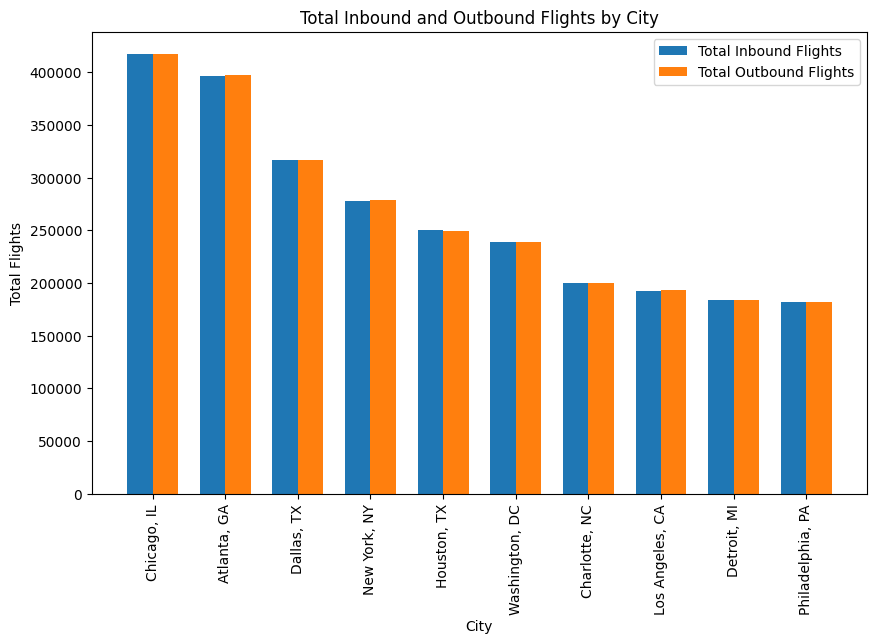

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
cities = df_merge_inbound_outbound_2009['City']
inbound = df_merge_inbound_outbound_2009['Total_inbound_flights']
outbound = df_merge_inbound_outbound_2009['Total_outbound_flights']
width = 0.35
x = np.arange(len(cities))  # the label locations

plt.figure(figsize=(10, 6))

# Plot the inbound and outbound flights side by side
plt.bar(x - width/2, inbound, width, label='Total Inbound Flights')
plt.bar(x + width/2, outbound, width, label='Total Outbound Flights')
plt.xlabel('City')
plt.ylabel('Total Flights')
plt.title('Total Inbound and Outbound Flights by City')
plt.xticks(x, cities, rotation=90)
plt.legend()
plt.show()
